# Ayudantía 4: Laboratorio 2 Parte 1

4 septiembre 2025

diego.herrerag00@uc.cl

Descripción del problema
En este laboratorio utilizará un conjunto de datos que recopila información sobre hoteles internacionales,
usuarios que realizaron reservas y rese˜nas que describen su experiencia durante la estadía. Estos datos están
divididos en tres archivos:
• hotels.csv: cada fila describe un hotel, incluyendo atributos como ubicaci´on geográfica, categoría, y
puntajes de referencia o “base” en distintas dimensiones (ej. limpieza, comodidad, ubicación, etc.).
• users.csv: cada fila corresponde a un usuario de la plataforma, con información demogr´afica y de
contexto relevante para caracterizar su comportamiento de rese˜na.
• reviews.csv: cada fila representa una rese˜na realizada por un usuario sobre un hotel en una fecha
determinada.
En base a los campos recién descritos y utilizando las librerías presentadas en clases, deberá responder una
serie de preguntas relacionadas con el an´alisis de datos tabulares en Python.

In [432]:
# Primero que todo, abrimos los archivos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_hoteles = pd.read_csv("hotels.csv")
df_usuarios = pd.read_csv("users.csv")
df_reviews = pd.read_csv("reviews.csv")

In [433]:
df_hoteles

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,NaN,5,40.75800,-73.985500,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,9,100.00000,2.352200,8.8,9.4,8.7,9.6,13.0,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.3,9.5,9.6,8.9,9.4,8.5
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.2,9.1,9.4,9.7,9.1,8.3
6,7,Sydney Harbour Grand,Sydney,Australia,5,-33.86510,151.209900,8.9,-2.0,8.5,9.8,8.9,8.4
7,8,Copacabana Lux,NaN,Brazil,5,NaN,-43.172900,9.0,8.7,8.6,9.5,8.8,8.6
8,9,Berlin Mitte Elite,Berlin,Germany,5,52.52000,13.405000,9.3,9.2,9.0,9.1,9.1,8.7
9,10,The Maple Grove,Toronto,Canada,5,43.65320,-79.383200,9.4,9.3,9.2,8.8,9.2,8.8


In [434]:
df_usuarios

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18
...,...,...,...,...,...,...
1995,1996,Male,Netherlands,45-54,Couple,2020-09-06
1996,1997,Female,South Korea,18-24,Couple,2023-05-24
1997,1998,Male,China,45-54,Solo,2022-12-09
1998,1999,Female,China,55+,Business,2024-12-27


In [435]:
df_reviews

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,14.0,8.7,8.5,9.0,8.8,NaN,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,-3.0,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1786,24,2022-08-07,8.4,8.2,8.2,8.5,9.1,8.3,7.5,Thing her against garden method magazine. Inte...
49996,49997,1739,8,2025-03-05,8.8,8.8,9.0,8.0,9.5,8.8,8.7,But benefit away major. Story kid often offici...
49997,49998,1566,6,2025-05-03,NaN,9.8,9.1,8.5,9.6,-3.0,8.0,But certainly part special moment certain buil...
49998,49999,10,21,2024-09-27,NaN,8.7,9.1,8.7,9.7,9.0,8.7,Ask suffer space return. Hospital material the...


In [436]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_hoteles.isnull().sum()

hotel_id                0
hotel_name              0
city                    1
country                 1
star_rating             0
lat                     1
lon                     1
cleanliness_base        1
comfort_base            1
facilities_base         1
location_base           1
staff_base              0
value_for_money_base    1
dtype: int64

In [437]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_usuarios.isnull().sum()

user_id             0
user_gender         0
country           100
age_group           0
traveller_type     99
join_date          97
dtype: int64

In [438]:
# A simple vista se ven valores nulos, antes de limpiarlos procedemos a confirmar su existencia
df_reviews.isnull().sum()

review_id                   0
user_id                     0
hotel_id                    0
review_date              1216
score_overall            2422
score_cleanliness        2422
score_comfort            2422
score_facilities         2427
score_location           2435
score_staff              2416
score_value_for_money    2427
review_text               824
dtype: int64

In [439]:
#Podeos notar que el data frame de las reviews tiene muchisimos valores nulos, sin embargo esto podría deberse por poseer 
# muchisimos datos. Para ver cuantos datos posee, usamos ".size":

df_reviews.size

600000

## Limpieza de datos

### hotels

In [440]:
df_hoteles

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,NaN,5,40.75800,-73.985500,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,9,100.00000,2.352200,8.8,9.4,8.7,9.6,13.0,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.3,9.5,9.6,8.9,9.4,8.5
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.2,9.1,9.4,9.7,9.1,8.3
6,7,Sydney Harbour Grand,Sydney,Australia,5,-33.86510,151.209900,8.9,-2.0,8.5,9.8,8.9,8.4
7,8,Copacabana Lux,NaN,Brazil,5,NaN,-43.172900,9.0,8.7,8.6,9.5,8.8,8.6
8,9,Berlin Mitte Elite,Berlin,Germany,5,52.52000,13.405000,9.3,9.2,9.0,9.1,9.1,8.7
9,10,The Maple Grove,Toronto,Canada,5,43.65320,-79.383200,9.4,9.3,9.2,8.8,9.2,8.8


In [441]:
df_hoteles.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base'],
      dtype='object')

In [442]:
# Columna "city" tiene valores nulos, cuyo hotel_id es 8
df_hoteles["city"]
df_hoteles.loc[df_hoteles["hotel_id"] == 8, "city"] = "Rio de Janeiro"


In [443]:
# columna "country" tiene valores nulos, cuyo hotel_id es 1
df_hoteles["country"]
df_hoteles.loc[df_hoteles["hotel_id"] == 1, "country"] = "United States"

In [444]:
# columna lat tiene valores nulos, por lo que esas filas se eliminarán
df_hoteles = df_hoteles.dropna(subset=["lat"])


Columnas scores de df_hoteles

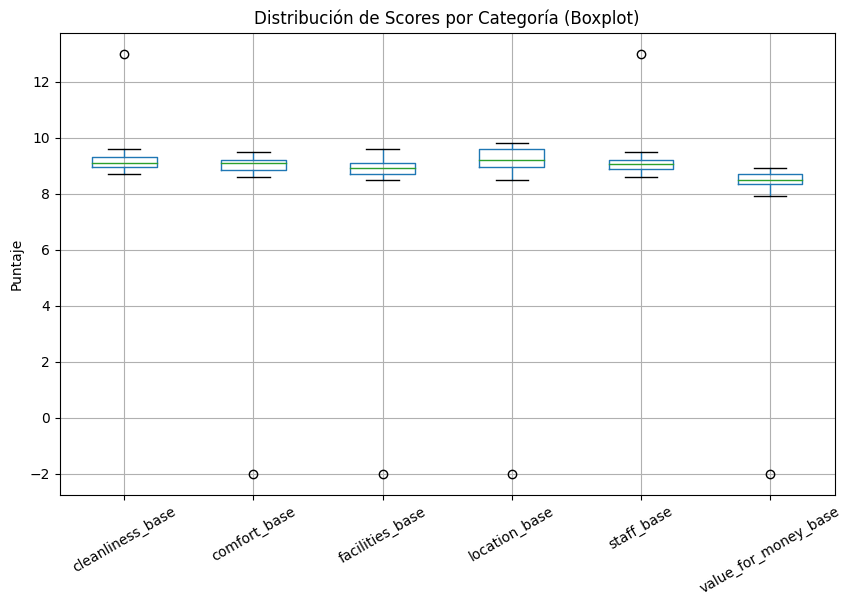

In [445]:
# Ahora, se revisaran las columnas de scores, para eso se realiza un boxplot de cada una de ellas
score_cols = [
    "cleanliness_base", "comfort_base", "facilities_base",
    "location_base", "staff_base", "value_for_money_base"
]

plt.figure(figsize=(10, 6))
df_hoteles[score_cols].boxplot()
plt.title("Distribución de Scores por Categoría (Boxplot)")
plt.ylabel("Puntaje")
plt.xticks(rotation=30)
plt.show()

Primero para las columnas que tengan score NaN se van a reemplazar por la media de la columna respectiva.

In [446]:
for col in score_cols:
    mean_value = df_hoteles[col].mean()
    df_hoteles[col].fillna(mean_value, inplace=True)

/var/folders/h6/970grw817w9g6s3tnbd5gd080000gn/T/ipykernel_47623/3941162694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hoteles[col].fillna(mean_value, inplace=True)


In [447]:
df_hoteles

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.75800,-73.985500,9.100000,8.800000,8.900000,9.500000,8.6,8.00000
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.000000,9.200000,8.800000,9.400000,9.0,7.90000
2,3,L'Étoile Palace,Paris,France,9,100.00000,2.352200,8.800000,9.400000,8.700000,9.600000,13.0,8.10000
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.600000,9.000000,9.300000,8.500000,9.5,8.20000
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.300000,9.500000,9.600000,8.900000,9.4,8.50000
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.200000,9.100000,9.400000,9.700000,9.1,8.30000
6,7,Sydney Harbour Grand,Sydney,Australia,5,-33.86510,151.209900,8.900000,-2.000000,8.500000,9.800000,8.9,8.40000
8,9,Berlin Mitte Elite,Berlin,Germany,5,52.52000,13.405000,9.300000,9.200000,9.000000,9.100000,9.1,8.70000
9,10,The Maple Grove,Toronto,Canada,5,43.65320,-79.383200,9.400000,9.300000,9.200000,8.800000,9.2,8.80000
10,11,The Bund Palace,Shanghai,China,5,31.23040,121.473700,9.100000,8.604348,8.456522,9.600000,9.0,8.90000


Se visualiza que hay valores extremos en todas las columnas de score, pero como son tan pocos datos, no conviene eliminarlos.


In [448]:
# primero que todo todos lo valores de scores deben estar entre 0 y 10 (supuesto realizado)
for col in score_cols:
    df_hoteles = df_hoteles[(df_hoteles[col] >= 0) & (df_hoteles[col] <= 10)]
    

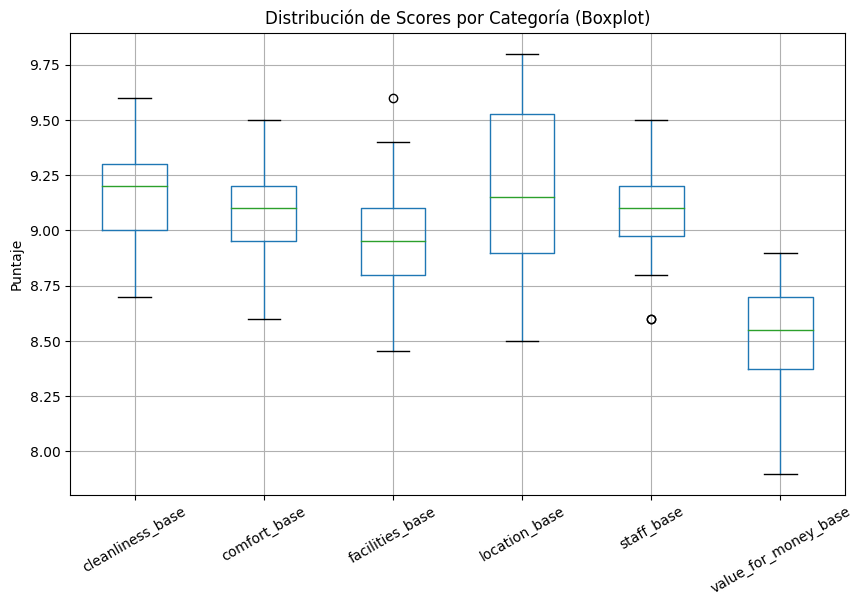

In [449]:

plt.figure(figsize=(10, 6))
df_hoteles[score_cols].boxplot()
plt.title("Distribución de Scores por Categoría (Boxplot)")
plt.ylabel("Puntaje")
plt.xticks(rotation=30)
plt.show()

In [450]:
df_hoteles

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.75800,-73.985500,9.100000,8.800000,8.900000,9.500000,8.6,8.00000
1,2,The Royal Compass,London,United Kingdom,5,51.50720,-0.127600,9.000000,9.200000,8.800000,9.400000,9.0,7.90000
3,4,Kyo-to Grand,Tokyo,Japan,5,35.68950,139.691700,9.600000,9.000000,9.300000,8.500000,9.5,8.20000
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.27690,55.296200,9.300000,9.500000,9.600000,8.900000,9.4,8.50000
5,6,Marina Bay Zenith,Singapore,Singapore,5,1.29027,103.851959,9.200000,9.100000,9.400000,9.700000,9.1,8.30000
8,9,Berlin Mitte Elite,Berlin,Germany,5,52.52000,13.405000,9.300000,9.200000,9.000000,9.100000,9.1,8.70000
9,10,The Maple Grove,Toronto,Canada,5,43.65320,-79.383200,9.400000,9.300000,9.200000,8.800000,9.2,8.80000
10,11,The Bund Palace,Shanghai,China,5,31.23040,121.473700,9.100000,8.604348,8.456522,9.600000,9.0,8.90000
12,13,The Gateway Royale,Mumbai,India,5,19.07600,NaN,8.900000,8.800000,8.700000,9.200000,8.8,8.60000
13,14,Colosseum Gardens,Rome,Italy,5,41.90280,12.496400,9.200000,9.100000,8.900000,9.800000,9.0,8.70000


Ya se tiene el dataframe limpio, sin valores nulos y con valores de scores entre 0 y 10.

## Users

In [451]:
df_usuarios

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18
...,...,...,...,...,...,...
1995,1996,Male,Netherlands,45-54,Couple,2020-09-06
1996,1997,Female,South Korea,18-24,Couple,2023-05-24
1997,1998,Male,China,45-54,Solo,2022-12-09
1998,1999,Female,China,55+,Business,2024-12-27


In [452]:
conteo_paises_usuarios = df_usuarios['country'].value_counts(dropna=False)
conteo_paises_usuarios

country
United States           260
United Kingdom          217
Germany                 143
China                   137
France                  125
NaN                     100
Japan                    95
Brazil                   94
Canada                   93
Spain                    64
Australia                63
India                    58
South Korea              58
United Arab Emirates     57
Russia                   56
Italy                    48
Mexico                   45
New Zealand              45
Turkey                   36
Argentina                35
Netherlands              34
Thailand                 32
INVALID_LABEL            30
South Africa             29
Nigeria                  18
Egypt                    15
Singapore                13
Name: count, dtype: int64

Dado que no se tiene información de los paises de usuarios, se van a eliminar los datos de Nan y INVALID_LABEL

In [453]:
df_usuarios = df_usuarios[~df_usuarios['country'].isna() & (df_usuarios['country'] != 'INVALID_LABEL')]

In [454]:
df_usuarios["country"].unique()

array(['United Kingdom', 'Mexico', 'India', 'Japan', 'Brazil', 'Spain',
       'Nigeria', 'New Zealand', 'United States', 'Australia', 'Germany',
       'France', 'China', 'Russia', 'Egypt', 'Argentina', 'South Africa',
       'Italy', 'Thailand', 'United Arab Emirates', 'South Korea',
       'Turkey', 'Netherlands', 'Canada', 'Singapore'], dtype=object)

Ahora revisando la columna de age_group

In [455]:
df_usuarios["age_group"].unique()
# se puede decir que esta completa

array(['35-44', '25-34', '45-54', '18-24', '55+'], dtype=object)

Para las dos columnas restantes "traveller_type" y "join_date", se eliminaran las filas que tienen Nan y INVALID_LABEL, ya que son pocos datos y no se puede inferir su valor.

python
df_usuarios = df_usuarios[~df_usuarios['traveller_type'].isna
& (df_usuarios['traveller_type'] != 'INVALID_LABEL')]
df_usuarios = df_usuarios[~df_usuarios['join_date'].isna()
& (df_usuarios['join_date'] != 'INVALID_LABEL')]


In [456]:
# Filtrar traveller_type
df_usuarios = df_usuarios[(~df_usuarios['traveller_type'].isna()) & (df_usuarios['traveller_type'] != 'INVALID_LABEL')]
# Filtrar join_date
df_usuarios = df_usuarios[(~df_usuarios['join_date'].isna()) & (df_usuarios['join_date'] != 'INVALID_LABEL')]

In [457]:
df_usuarios

,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18
...,...,...,...,...,...,...
1995,1996,Male,Netherlands,45-54,Couple,2020-09-06
1996,1997,Female,South Korea,18-24,Couple,2023-05-24
1997,1998,Male,China,45-54,Solo,2022-12-09
1998,1999,Female,China,55+,Business,2024-12-27


## Reviews

In [458]:
df_reviews

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,14.0,8.7,8.5,9.0,8.8,NaN,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,-3.0,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,1786,24,2022-08-07,8.4,8.2,8.2,8.5,9.1,8.3,7.5,Thing her against garden method magazine. Inte...
49996,49997,1739,8,2025-03-05,8.8,8.8,9.0,8.0,9.5,8.8,8.7,But benefit away major. Story kid often offici...
49997,49998,1566,6,2025-05-03,NaN,9.8,9.1,8.5,9.6,-3.0,8.0,But certainly part special moment certain buil...
49998,49999,10,21,2024-09-27,NaN,8.7,9.1,8.7,9.7,9.0,8.7,Ask suffer space return. Hospital material the...


Primero se eliminaran si existen reviews repetidas

In [459]:
df_reviews = df_reviews.drop_duplicates()

Luego, se eliminaran los review_date que son NaN 

In [460]:
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
df_reviews = df_reviews.dropna(subset=['review_date']).reset_index(drop=True)

In [461]:
df_reviews

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,14.0,8.7,8.5,9.0,8.8,NaN,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,-3.0,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...
...,...,...,...,...,...,...,...,...,...,...,...,...
48779,49996,1786,24,2022-08-07,8.4,8.2,8.2,8.5,9.1,8.3,7.5,Thing her against garden method magazine. Inte...
48780,49997,1739,8,2025-03-05,8.8,8.8,9.0,8.0,9.5,8.8,8.7,But benefit away major. Story kid often offici...
48781,49998,1566,6,2025-05-03,NaN,9.8,9.1,8.5,9.6,-3.0,8.0,But certainly part special moment certain buil...
48782,49999,10,21,2024-09-27,NaN,8.7,9.1,8.7,9.7,9.0,8.7,Ask suffer space return. Hospital material the...


Ahora podemos ver el boxplot de las puntuaciones de las reviews

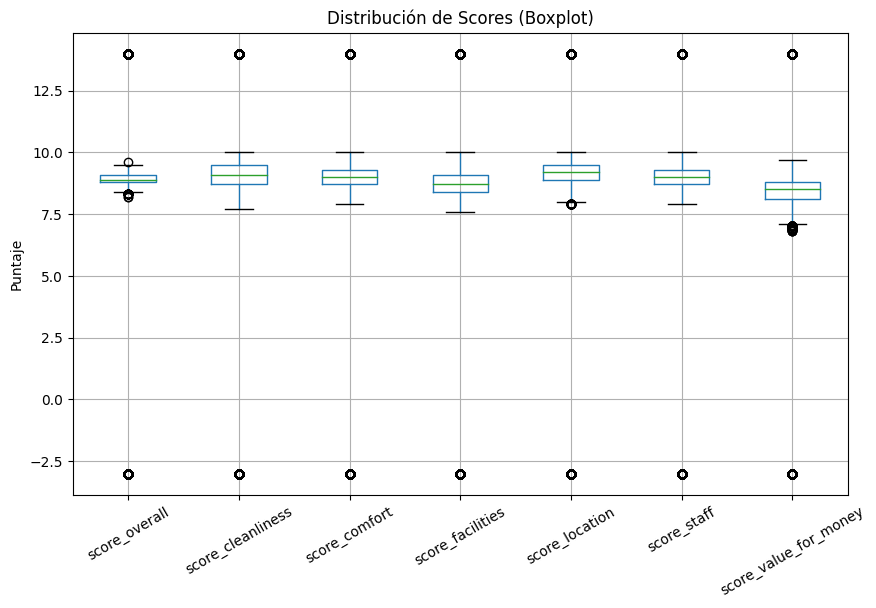

In [462]:
score_cols = [
    "score_overall","score_cleanliness","score_comfort",
    "score_facilities","score_location","score_staff",
    "score_value_for_money"
]

plt.figure(figsize=(10,6))
df_reviews[score_cols].boxplot()
plt.title("Distribución de Scores (Boxplot)")
plt.ylabel("Puntaje")
plt.xticks(rotation=30)
plt.show()


In [463]:
nans_scores = df_reviews[score_cols].isna().sum()

print(nans_scores)

score_overall            2350
score_cleanliness        2366
score_comfort            2349
score_facilities         2366
score_location           2371
score_staff              2355
score_value_for_money    2377
dtype: int64


Dado que son muchos datos NaN, se recomienda rellenar con la mediana por hotel, ya que es la manera más robusta de rellenar los datos faltantes y ya que cada hotel se compara consigo mismo.

In [464]:
df_reviews[score_cols] = df_reviews.groupby("hotel_id")[score_cols].transform(
    lambda x: x.fillna(x.median())
)

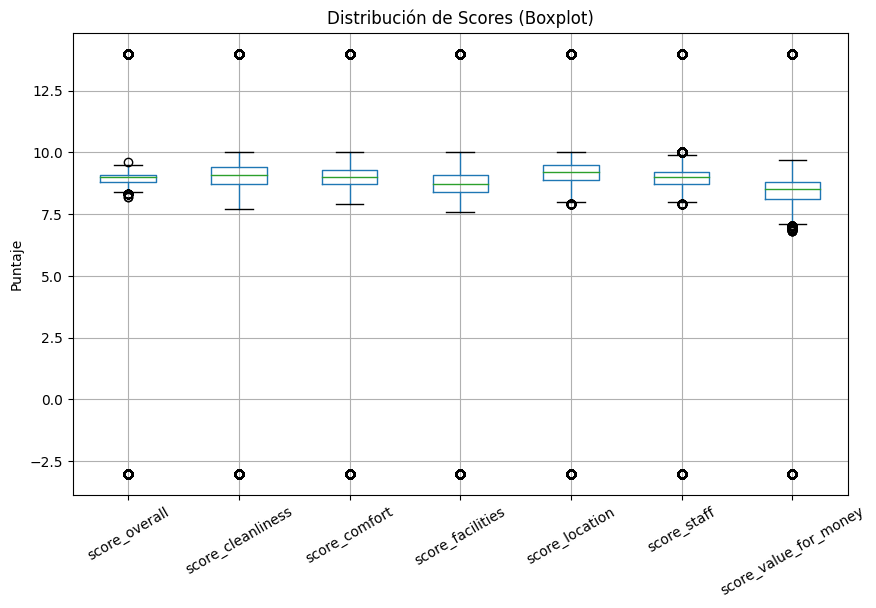

In [465]:

plt.figure(figsize=(10,6))
df_reviews[score_cols].boxplot()
plt.title("Distribución de Scores (Boxplot)")
plt.ylabel("Puntaje")
plt.xticks(rotation=30)
plt.show()


Nuevamente asumimos que los scores deben estar entre 0 y 10


In [466]:
for col in score_cols:
    df_reviews = df_reviews[(df_reviews[col] >= 0) & (df_reviews[col] <= 10)]

In [467]:
df_reviews

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...
5,6,800,7,2025-08-10,8.7,8.2,8.7,8.1,9.5,9.0,8.8,Truth forget computer current bad billion lead...
6,7,830,23,2022-06-05,8.9,8.1,9.0,8.6,9.6,9.2,8.2,School hour matter. Anyone discover local he t...
...,...,...,...,...,...,...,...,...,...,...,...,...
48776,49993,1737,7,2024-06-19,8.9,9.1,9.3,9.3,9.0,8.8,8.1,Act issue movement fund south term there. Pres...
48779,49996,1786,24,2022-08-07,8.4,8.2,8.2,8.5,9.1,8.3,7.5,Thing her against garden method magazine. Inte...
48780,49997,1739,8,2025-03-05,8.8,8.8,9.0,8.0,9.5,8.8,8.7,But benefit away major. Story kid often offici...
48782,49999,10,21,2024-09-27,8.9,8.7,9.1,8.7,9.7,9.0,8.7,Ask suffer space return. Hospital material the...


Ya con el df_reviews con los scores limpios, podemos eliminar todos los reviews que tengan Nan en la columna review_text, ya que no aportan nada al análisis.

In [468]:
nans_text = df_reviews["review_text"].isna().sum()

print(nans_text)

663


In [469]:
df_hoteles.isnull().sum()

hotel_id                0
hotel_name              0
city                    0
country                 0
star_rating             0
lat                     0
lon                     1
cleanliness_base        0
comfort_base            0
facilities_base         0
location_base           0
staff_base              0
value_for_money_base    0
dtype: int64

In [470]:
df_usuarios.isnull().sum()

user_id           0
user_gender       0
country           0
age_group         0
traveller_type    0
join_date         0
dtype: int64

In [471]:
df_reviews.isnull().sum()

review_id                  0
user_id                    0
hotel_id                   0
review_date                0
score_overall              0
score_cleanliness          0
score_comfort              0
score_facilities           0
score_location             0
score_staff                0
score_value_for_money      0
review_text              663
dtype: int64

### a) Analice y describa la relación entre el puntaje global entregado por los usuarios y los sub-puntajes de las distintas dimensiones de la reseña, es decir, cómo se calcula. Evalúe en qué medida ambos son consistentes y comente posibles discrepancias.

In [472]:
# Veamos nuevamente las columnas para verificar cuales son las de "score" correspondientes a los calculos
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [473]:
def calculo(fila):
    puntaje = (fila["score_cleanliness"] + fila["score_comfort"] + fila["score_facilities"] + fila["score_location"] + fila["score_staff"] + fila["score_value_for_money"]) / 5
    puntaje = float(puntaje)
    return list(range(int(puntaje)-1,int(puntaje)+2))

In [474]:
df_reviews.apply(calculo, axis=1)

1         [9, 10, 11]
3         [9, 10, 11]
4         [9, 10, 11]
5         [9, 10, 11]
6         [9, 10, 11]
             ...     
48776     [9, 10, 11]
48779      [8, 9, 10]
48780     [9, 10, 11]
48782     [9, 10, 11]
48783    [10, 11, 12]
Length: 39397, dtype: object

Para ver como están calculado el overall score a partir de los demás tipos de score una forma rápida seía suponer que el overall corresponde al promedio ponderado de los demás score. Verifiquemos si es cierto. 

In [475]:
# Supongamos que el score_overall es el puntaje ponderado
def calculo_puntaje(fila, rango):
    puntaje = (fila["score_cleanliness"] + fila["score_comfort"] + fila["score_facilities"] + fila["score_location"] + fila["score_staff"] + fila["score_value_for_money"]) / 5
    if abs(fila["score_overall"] - puntaje) <= rango:
        return True
    else:
        return False

In [476]:
contador_true = 0
contador_false = 0
rango = 0.5 
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 0
False: 39397


Claramente el puntaje no es el promedio ponderado. Probemos entonces con el Promedio Aritmetico.

In [477]:
# Supongamos que el score_overall es el puntaje ponderado
def calculo_puntaje(fila, rango):
    puntaje = (fila["score_cleanliness"]* 0.2 + fila["score_comfort"]* 0.1 + fila["score_facilities"]*0.15 + fila["score_location"]*0.2 + fila["score_staff"]*0.2 + fila["score_value_for_money"]*0.15) / 5
    if abs(fila["score_overall"] - puntaje) <= rango:
        return True
    else:
        return False

In [478]:
contador_true = 0
contador_false = 0
rango = 0.5 
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 0
False: 39397


Tuvimos ahora un peor escenario. Probemos entonces con Promedio geometrico. 

In [479]:
def calculo_puntaje(fila, rango):
    scores = [
        fila["score_cleanliness"],
        fila["score_comfort"],
        fila["score_facilities"],
        fila["score_location"],
        fila["score_staff"],
        fila["score_value_for_money"]
    ]
    producto = 1
    n = len(scores)
    for s in scores:
        producto *= s
    puntaje_geo = producto ** (1/n)
    if abs(fila["score_overall"] - puntaje_geo) <= rango:
        return True
    else:
        return False

In [480]:
contador_true = 0
contador_false = 0
rango = 0.5
for _, fila in df_reviews.iterrows():
    if calculo_puntaje(fila, rango):
        contador_true += 1
    else:
        contador_false += 1
print(f"True: {contador_true}")
print(f"False: {contador_false}")

True: 39390
False: 7


Hay un escenario muchisimo mejor.

### ¿Son consistentes?

Analizemoslo más directo con las correlación de cada uno y el overall score. 

In [481]:
#Para ver más directo las columnas
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [482]:
# Calculemos la correlación de cada sub-puntaje con score_overall
columnas = ['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money']
correlaciones = {}
for columna in columnas:
    correlaciones[columna] = df_reviews['score_overall'].corr(df_reviews[columna])
correlaciones

{'score_cleanliness': 0.5225987121704404,
 'score_comfort': 0.444414167922028,
 'score_facilities': 0.416533243684534,
 'score_location': 0.06793308481703632,
 'score_staff': 0.3974235097579002,
 'score_value_for_money': 0.4475593127019611}

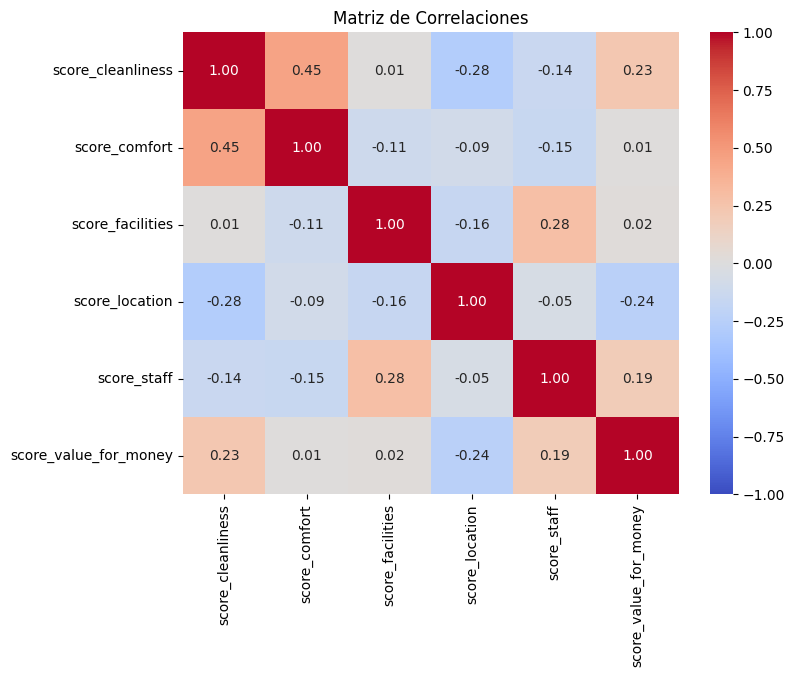

In [483]:
matriz_corr = df_reviews[columnas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

### Comente estos resultados

### b) Compare el desempeño observado de los hoteles con los puntajes de referencia que estos poseen en cada dimensión. Genere un índice que capture la diferencia entre ambas mediciones y determine qué hoteles aparecen sistemáticamente mejor o peor evaluados que su base.

In [484]:
df_hoteles.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base'],
      dtype='object')

In [485]:
df_reviews.columns

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

In [486]:
df_hoteles.size

260

In [487]:
df_reviews.size

472764

In [488]:
df_hoteles_reviews = pd.merge(df_hoteles, df_reviews, left_on='hotel_id', right_on='hotel_id')

In [489]:
df_hoteles_reviews.head()

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,...,user_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,1421,2020-12-04,8.8,8.3,8.6,9.1,9.5,9.1,7.5,Apply need explain movement wait above bar. Tu...
1,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,710,1899-12-31,8.8,9.3,9.4,8.2,9.1,8.7,8.4,Soldier job southern back check. Fall check pu...
2,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,1383,2020-09-06,8.7,8.2,8.8,8.7,9.3,9.0,7.4,Various get next environment. This them positi...
3,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,836,2024-07-25,8.7,8.1,8.8,9.0,9.6,9.2,6.9,Pm show itself term then attorney for. Politic...
4,1,The Azure Tower,New York,United States,5,40.758,-73.9855,9.1,8.8,8.9,...,486,2025-09-10,8.7,8.5,8.4,8.8,10.0,8.5,7.7,Rich strategy source wide board into situation...


In [490]:
df_hoteles_reviews.columns

Index(['hotel_id', 'hotel_name', 'city', 'country', 'star_rating', 'lat',
       'lon', 'cleanliness_base', 'comfort_base', 'facilities_base',
       'location_base', 'staff_base', 'value_for_money_base', 'review_id',
       'user_id', 'review_date', 'score_overall', 'score_cleanliness',
       'score_comfort', 'score_facilities', 'score_location', 'score_staff',
       'score_value_for_money', 'review_text'],
      dtype='object')

In [491]:
df_agrupado = df_hoteles_reviews.groupby(['hotel_id','cleanliness_base','comfort_base','facilities_base','location_base','staff_base','value_for_money_base'])[['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money', 'score_overall']].mean().reset_index()

In [492]:
df_agrupado.head()

,hotel_id,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,score_overall
0,1,9.1,8.8,8.9,9.5,8.6,8.0,9.061005,8.838232,8.742048,9.335178,8.685496,8.084224,8.835687
1,2,9.0,9.2,8.8,9.4,9.0,7.9,8.997045,9.112541,8.639002,9.266645,8.945174,8.005909,8.879186
2,4,9.6,9.0,9.3,8.5,9.5,8.2,9.383948,8.965825,9.023689,8.648803,9.323430,8.220259,8.969773
3,5,9.3,9.5,9.6,8.9,9.4,8.5,9.182051,9.325203,9.201313,8.933709,9.243277,8.428831,9.093621
4,6,9.2,9.1,9.4,9.7,9.1,8.3,9.129175,9.055514,9.067486,9.467675,9.033207,8.298614,9.054631


In [493]:
# Calcula la diferencia entre el puntaje base y el promedio de las reviews por hotel y dimensión
columnas_hoteles = ['cleanliness_base', 'comfort_base', 'facilities_base','location_base', 'staff_base', 'value_for_money_base']
columnas_reviews = ['score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money']

# Creamos un DataFrame con el hotel_id y las diferencias

for i in range(len(columnas_hoteles)):
    columna_base = columnas_hoteles[i]
    columna_review = columnas_reviews[i]
    diferencias = []
    for indice, fila in df_agrupado.iterrows():
        
        hotel_id = fila['hotel_id']
        diferencia = fila[columna_review] - fila[columna_base]
        diferencias.append({'hotel_id': hotel_id, 'diferencia': diferencia})
    
        df_diferencias = pd.DataFrame(diferencias)
    print(f"Dimensión: {columna_base}")
    print(df_diferencias)
    print("*"*60)



Dimensión: cleanliness_base
    hotel_id  diferencia
0        1.0   -0.038995
1        2.0   -0.002955
2        4.0   -0.216052
3        5.0   -0.117949
4        6.0   -0.070825
5        9.0   -0.112978
6       10.0   -0.135766
7       11.0   -0.033057
8       13.0    0.043085
9       14.0   -0.042466
10      15.0    0.003632
11      16.0   -0.094081
12      17.0   -0.241151
13      19.0   -0.057862
14      20.0   -0.011513
15      21.0   -0.041733
16      22.0   -0.168380
17      23.0    0.006108
18      24.0    0.085951
19      25.0   -0.102706
************************************************************
Dimensión: comfort_base
    hotel_id  diferencia
0        1.0    0.038232
1        2.0   -0.087459
2        4.0   -0.034175
3        5.0   -0.174797
4        6.0   -0.044486
5        9.0   -0.085643
6       10.0   -0.101327
7       11.0    0.376061
8       13.0    0.033015
9       14.0   -0.038552
10      15.0   -0.072114
11      16.0   -0.126942
12      17.0   -0.111683
13      19.0

Podemos notar que hay diferencias negativas y otras que son positivas, para cada hotel y para cada dimensión, esto quiere decir que, los hoteles con un puntaje base en una especifica dimensión tienden a recibir menores puntajes en las reviews de los usuarios para esa misma dimensión en caso de que la diferencia sea negativa. Y al reves, si se tiene una diferencia positiva, quiere decir que los puntaje base de una dimensión que tienen los hoteles tienden a recibir mejores puntajes que dicha base en esa misma dimensión por parte de los usuarios en las reviews

Por lo tanto, es posible afirmar que la mayoría de los hoteles reciben puntajes peores por parte de los usuarios con respecto a sus puntajes bases que cada uno de ellos tienen.

### c) Evalúe si existen diferencias notorias en la forma en que reseñan los usuarios según la fecha en que se unieron a la plataforma, comentando patrones que considere relevantes.

Primero convertimos las columnas de fecha "join_date" y "review_date" de los dataframes df_usuarios y df_reviews desde texto a formato datetime. Luego unimos usuarios con reseñas para, a partir de esa unión, calcular la antigüedad del usuario al momento de la reseña y analizar si existen diferencias en las evaluaciones según esa antigüedad.

In [494]:
# Copiamos los dataframes para no alterar los originales
usuarios = df_usuarios.copy()
reseñas = df_reviews.copy()

# Convertimos las columnas de fechas a tipo datetime
usuarios['fecha_union'] = pd.to_datetime(usuarios['join_date'])
reseñas['fecha_reseña'] = pd.to_datetime(reseñas['review_date'])

# Creamos la unión de los dataframes de usuarios y reseñas
df_usuarios_reseñas = reseñas.merge(
    usuarios[['user_id','fecha_union','age_group','traveller_type','country']],
    on='user_id',
    how='left'
)

# Antigüedad al reseñar (en días y meses) y grupos de ingreso
df_usuarios_reseñas['antiguedad_dias'] = (df_usuarios_reseñas['fecha_reseña'] - df_usuarios_reseñas['fecha_union']).dt.days
df_usuarios_reseñas['antiguedad_meses'] = (df_usuarios_reseñas['antiguedad_dias'] / 30.44).round(1)

# Clasificamos la antigüedad en rangos
def asignar_rango_antiguedad(meses):
    if meses <= 0:
        return 'Menos de 0'  # Antigüedad menor a 0 meses o sin fecha coherente.
    elif meses <= 3:
        return '0-3'        # Antigüedad entre 0 y 3 meses
    elif meses <= 6:
        return '3-6'        # Antigüedad entre 3 y 6 meses
    elif meses <= 12:
        return '6-12'       # Antigüedad entre 6 y 12 meses
    elif meses <= 24:
        return '12-24'      # Antigüedad entre 12 y 24 meses
    else:
        return 'Más de 24'  # Antigüedad mayor a 24 meses

df_usuarios_reseñas['rango_antiguedad'] = df_usuarios_reseñas['antiguedad_meses'].apply(asignar_rango_antiguedad)

# Creamos una columna con el año de ingreso de cada usuario
df_usuarios_reseñas['año_union'] = df_usuarios_reseñas['fecha_union'].dt.year


In [495]:
df_reviews.columns # Vemos nuevamente las columnas del data frame de las reseñas para luego copiarlas. 

Index(['review_id', 'user_id', 'hotel_id', 'review_date', 'score_overall',
       'score_cleanliness', 'score_comfort', 'score_facilities',
       'score_location', 'score_staff', 'score_value_for_money',
       'review_text'],
      dtype='object')

Calculamos, para cada reseña, el promedio de las sub-dimensiones (score_cleanliness, score_comfort, score_facilities, score_location, score_staff, score_value_for_money) y luego creamos una métrica de diferencia entre la calificación general (score_overall) y ese promedio. Esta diferencia indica si el puntaje general fue más alto o más bajo que el promedio de las sub-dimensiones (positivo = más alto; negativo = más bajo).

In [496]:
columnas_puntajes = ['score_cleanliness','score_comfort','score_facilities',
                     'score_location','score_staff','score_value_for_money']

# Calculamos el promedio de los puntajes de las dimensiones
df_usuarios_reseñas['promedio_puntajes'] = df_usuarios_reseñas[columnas_puntajes].mean(axis=1)

#Generamos una columna con la diferencia entre score_overall y el promedio de los puntajes
df_usuarios_reseñas['diferencia_score_overall_vs_promedio'] = df_usuarios_reseñas['score_overall'] - df_usuarios_reseñas['promedio_puntajes']

df_usuarios_reseñas.head()

,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,...,fecha_union,age_group,traveller_type,country,antiguedad_dias,antiguedad_meses,rango_antiguedad,año_union,promedio_puntajes,diferencia_score_overall_vs_promedio
0,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,...,2025-04-01,35-44,Couple,United Kingdom,-1834.0,-60.2,Menos de 0,2025.0,9.116667,-0.016667
1,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,...,NaT,NaN,NaN,NaN,NaN,NaN,Más de 24,NaN,8.883333,0.016667
2,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,...,2023-02-28,45-54,Family,Australia,-241.0,-7.9,Menos de 0,2023.0,9.050000,0.050000
3,6,800,7,2025-08-10,8.7,8.2,8.7,8.1,9.5,9.0,...,2024-09-19,25-34,Solo,United States,325.0,10.7,6-12,2024.0,8.716667,-0.016667
4,7,830,23,2022-06-05,8.9,8.1,9.0,8.6,9.6,9.2,...,2021-12-05,25-34,Business,China,182.0,6.0,3-6,2021.0,8.783333,0.116667


Generamos dos tablas de resumen: una por año de ingreso (año_union) y otra por rango de antigüedad (rango_antiguedad). En cada grupo calculamos, para score_overall, promedio_puntajes y diferencia_score_overall_vs_promedio, el número de reseñas (count), el promedio (mean) y la desviación estándar (std), redondeado a 2 decimales. Esto permite comparar el nivel y la variabilidad de las calificaciones según el año en que se unieron y según su antigüedad al reseñar.

In [497]:
# Resumen por año de ingreso y por rango de antigüedad
estadisticas_por_año = (
    df_usuarios_reseñas.groupby('año_union')[['score_overall','promedio_puntajes','diferencia_score_overall_vs_promedio']]
      .agg(['count','mean','std'])
      .round(2)
)

estadisticas_por_antiguedad = (  
    df_usuarios_reseñas.groupby('rango_antiguedad')[['score_overall','promedio_puntajes','diferencia_score_overall_vs_promedio']]
      .agg(['count','mean','std'])
      .round(2)
)



In [498]:
estadisticas_por_año

score_overall             promedio_puntajes              \
                  count  mean   std             count  mean   std   
año_union                                                           
1900.0              462  8.95  0.18               462  8.92  0.19   
2020.0             2255  8.95  0.18              2255  8.91  0.19   
2021.0             5785  8.95  0.18              5785  8.90  0.19   
2022.0             5891  8.94  0.18              5891  8.90  0.18   
2023.0             7397  8.94  0.18              7397  8.90  0.19   
2024.0             6878  8.95  0.18              6878  8.90  0.19   
2025.0             3639  8.94  0.18              3639  8.89  0.19   
2100.0              557  8.93  0.17               557  8.88  0.18   

          diferencia_score_overall_vs_promedio              
                                         count  mean   std  
año_union                                                   
1900.0                                     462  0.04  0.07  
2020.0                                    2255  0.04  0.07  
2021.0                                    5785  0.04  0.06  
2022.0                                    5891  0.04  0.06  
2023.0                                    7397  0.04  0.06  
2024.0                                    6878  0.04  0.06  
2025.0                                    3639  0.04  0.06  
2100.0                                     557  0.05  0.06

In [499]:
estadisticas_por_antiguedad

score_overall             promedio_puntajes              \
                         count  mean   std             count  mean   std   
rango_antiguedad                                                           
0-3                       1263  8.95  0.18              1263  8.91  0.19   
12-24                     4003  8.94  0.18              4003  8.90  0.19   
3-6                       1270  8.94  0.18              1270  8.90  0.19   
6-12                      2470  8.95  0.18              2470  8.90  0.19   
Menos de 0               17523  8.94  0.18             17523  8.90  0.19   
Más de 24                12868  8.95  0.18             12868  8.90  0.19   

                 diferencia_score_overall_vs_promedio              
                                                count  mean   std  
rango_antiguedad                                                   
0-3                                              1263  0.04  0.07  
12-24                                            4003  0.04  0.06  
3-6                                              1270  0.04  0.06  
6-12                                             2470  0.04  0.06  
Menos de 0                                      17523  0.04  0.06  
Más de 24                                       12868  0.04  0.06

#### Ahora, usaremos gráficos para identificar patrones, especificamente, el promedio de score_overall por año de unión permite observar tendencias en el tiempo y notar si quienes se unieron en ciertos años tienden a evaluar más alto o más bajo. Otro es el promedio de score_overall por rango de antigüedad muestra si la experiencia acumulada del usuario al momento de reseñar influye en su calificación. Y por ultimo, graficamos la brecha promedio entre score_overall y el promedio de los puntajes, calculada por rangos de antigüedad. Estas visualizaciones facilitan comparar grupos, detectar posibles sesgos y así fortalecer el análisis. 

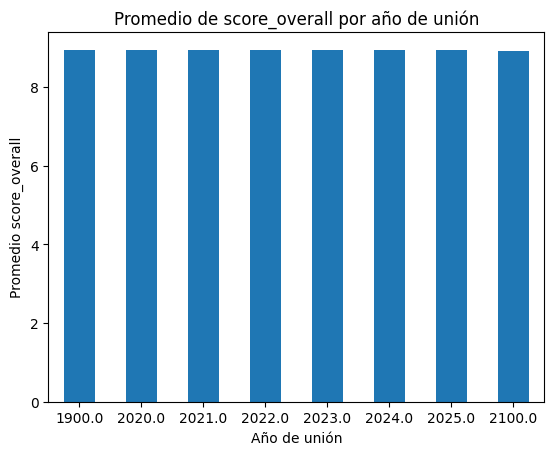

In [500]:
promedio_por_año = (df_usuarios_reseñas.groupby('año_union')['score_overall'].mean().sort_index())

plt.figure()
promedio_por_año.plot(kind='bar')
plt.title('Promedio de score_overall por año de unión')
plt.xlabel('Año de unión')
plt.ylabel('Promedio score_overall')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()




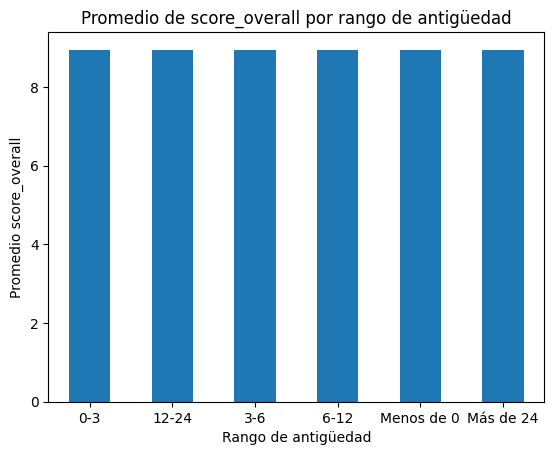

In [501]:
# Graficaremos ahora el el promedio de score_overall por rango de antigüedad
promedio_por_rango = (df_usuarios_reseñas.groupby('rango_antiguedad')['score_overall'].mean())

plt.figure()
promedio_por_rango.plot(kind='bar')
plt.title('Promedio de score_overall por rango de antigüedad')
plt.xlabel('Rango de antigüedad')
plt.ylabel('Promedio score_overall')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()

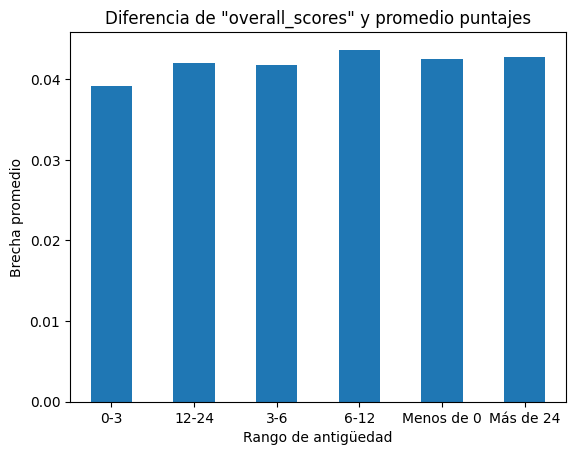

In [502]:
# Graficaremos ahora la diferencia del score_overall y los promedio de los puntajos, por rango de antigüedad
diferencia_por_rango = (df_usuarios_reseñas.groupby('rango_antiguedad')['diferencia_score_overall_vs_promedio'].mean())

plt.figure()
diferencia_por_rango.plot(kind='bar')
plt.title('Diferencia de "overall_scores" y promedio puntajes')
plt.xlabel('Rango de antigüedad')
plt.ylabel('Brecha promedio')
plt.xticks(rotation=0) # Esto sirve para que las etiquetas del eje x no se vean rotadas verticalmente, sino que se mantengan horizontales.
plt.show()